# 01_eda.ipynb


"""
# Exploratory Data Analysis (EDA)

This notebook performs an exploratory data analysis on the credit card transactions dataset to:
- Understand the data structure
- Visualize class imbalance
- Explore feature distributions
- Check correlation patterns
"""


In [1]:
#  Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid")

#  Load Dataset
data_path = '/content/first_500_rows.csv'  # Modify path if needed
df = pd.read_csv(data_path)
df.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,id
0,156779.000000,-0.888319,1.551782,-1.254353,-1.178184,0.618713,-1.525601,1.190115,0.152031,-0.316529,...,0.946047,-0.161775,0.039476,-0.269840,0.082890,0.474943,0.320537,8.99,0,254539
1,30160.737902,0.150664,0.719368,-0.813954,1.304551,0.608530,-1.708730,-0.013450,-0.110836,-0.797498,...,-0.568152,-0.565164,0.233635,2.454897,1.058056,0.733354,1.145127,11195.72,1,853146
2,58988.258985,-0.743341,0.524120,-0.319596,-0.991261,-0.398589,-0.297605,-0.034214,0.634144,0.428446,...,-0.714539,0.481388,-0.066491,-0.296562,0.386444,-0.234732,-0.128378,22752.97,0,462633
3,61466.000000,0.782048,-0.122077,0.323407,2.418056,0.029235,0.702427,0.024739,0.312446,-0.835219,...,0.490129,-0.187922,-0.295750,0.365694,0.176568,-0.023010,0.024074,152.13,0,86945
4,67135.070081,1.822436,-0.477496,-0.038215,-0.560011,0.460353,0.335919,0.383116,-0.174881,2.075916,...,0.526747,-0.067710,0.057417,0.457387,-1.149393,-0.280869,-0.276916,639.81,0,443112


"""
## Dataset Overview

Let's check the shape, data types, and summary statistics of the dataset.
"""

In [2]:
# Data Overview
print("Shape:", df.shape)
df.info()
df.describe()

# Check for nulls and duplicates
print("\nMissing values:\n", df.isnull().sum())
print("\nDuplicates:", df.duplicated().sum())


Shape: (500, 32)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 32 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    500 non-null    float64
 1   V1      500 non-null    float64
 2   V2      500 non-null    float64
 3   V3      500 non-null    float64
 4   V4      500 non-null    float64
 5   V5      500 non-null    float64
 6   V6      500 non-null    float64
 7   V7      500 non-null    float64
 8   V8      500 non-null    float64
 9   V9      500 non-null    float64
 10  V10     500 non-null    float64
 11  V11     500 non-null    float64
 12  V12     500 non-null    float64
 13  V13     500 non-null    float64
 14  V14     500 non-null    float64
 15  V15     500 non-null    float64
 16  V16     500 non-null    float64
 17  V17     500 non-null    float64
 18  V18     500 non-null    float64
 19  V19     500 non-null    float64
 20  V20     500 non-null    float64
 21  V21     500 non-null  

"""
## Class Distribution

We'll visualize the distribution of the target variable `Class` (1 = Fraud, 0 = Non-Fraud).
"""


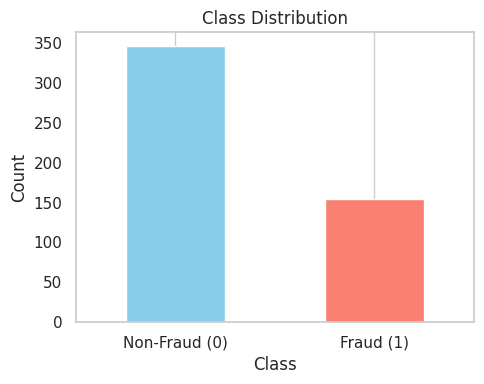

In [3]:
# Code Cell 5: Class Distribution
plt.figure(figsize=(5,4))
df['Class'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Class Distribution')
plt.xticks(ticks=[0, 1], labels=['Non-Fraud (0)', 'Fraud (1)'], rotation=0)
plt.ylabel('Count')
plt.grid(axis='y')
plt.tight_layout()
plt.show()



"""
## Correlation Heatmap

Let's visualize how features correlate with each other and with the `Class` label.
"""

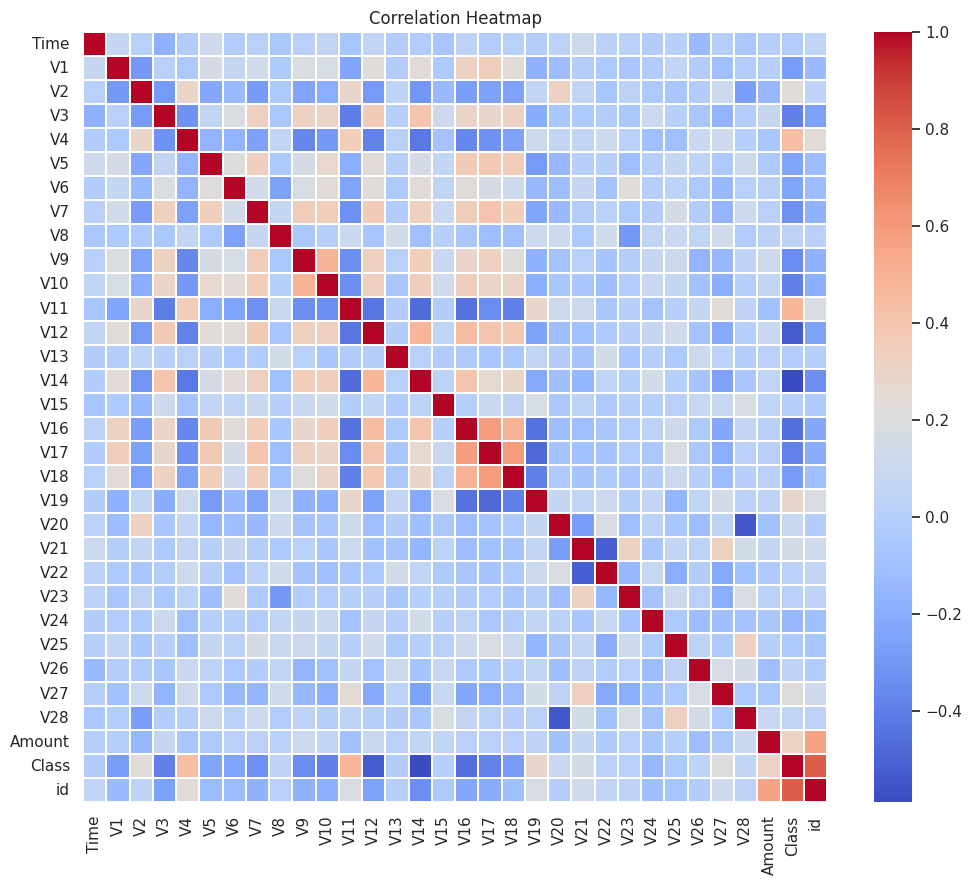

In [4]:
# Code Cell 6: Correlation Heatmap
plt.figure(figsize=(12,10))
corr = df.corr()
sns.heatmap(corr, cmap='coolwarm', annot=False, fmt='.2f', linewidths=0.1)
plt.title('Correlation Heatmap')
plt.show()


"""
## Distribution of Selected Features

We will plot the distribution of a few anonymized features (e.g., V1, V2, V3...) to see how they differ for fraudulent and non-fraudulent transactions.
"""

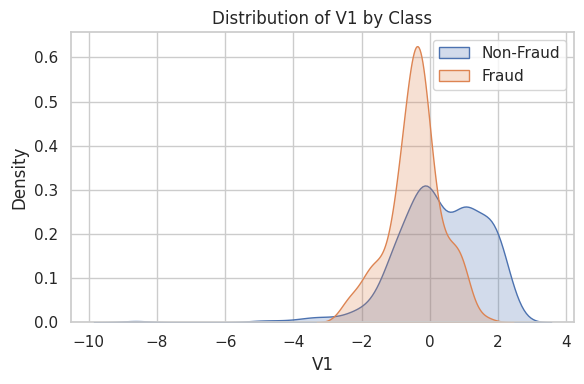

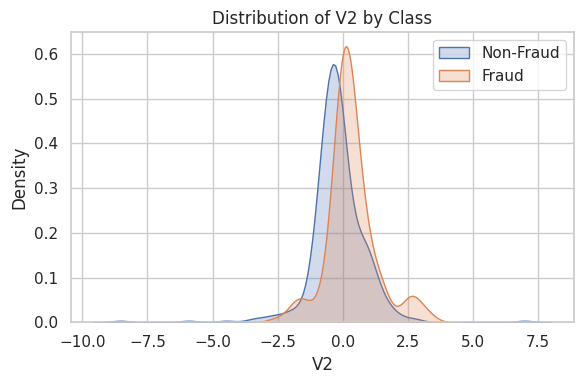

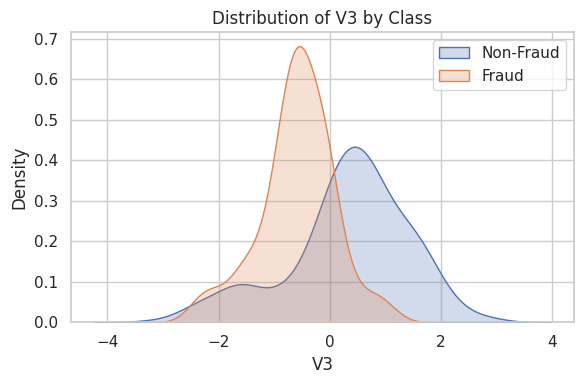

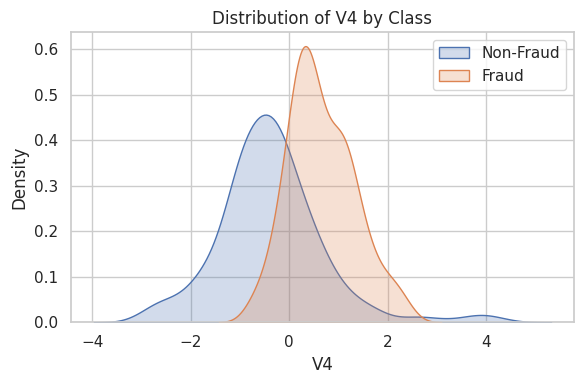

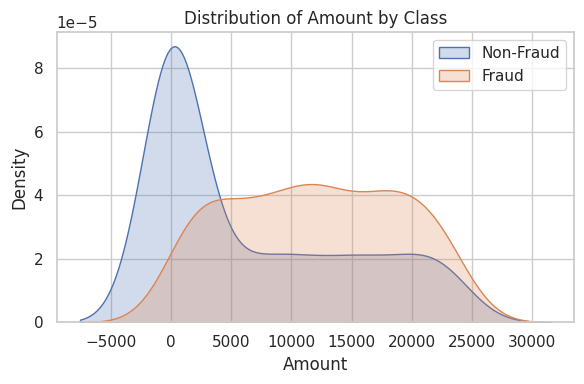

In [5]:
# Code Cell 7: Plot distributions of key features
features_to_plot = ['V1', 'V2', 'V3', 'V4', 'Amount']

for feature in features_to_plot:
    plt.figure(figsize=(6,4))
    sns.kdeplot(df[df['Class'] == 0][feature], label='Non-Fraud', fill=True)
    sns.kdeplot(df[df['Class'] == 1][feature], label='Fraud', fill=True)
    plt.title(f'Distribution of {feature} by Class')
    plt.legend()
    plt.tight_layout()
    plt.show()


"""
## Time Pattern (if Time column is available)

If the `Time` column exists, we can analyze how transactions are distributed over time and whether fraud is time-dependent.
"""

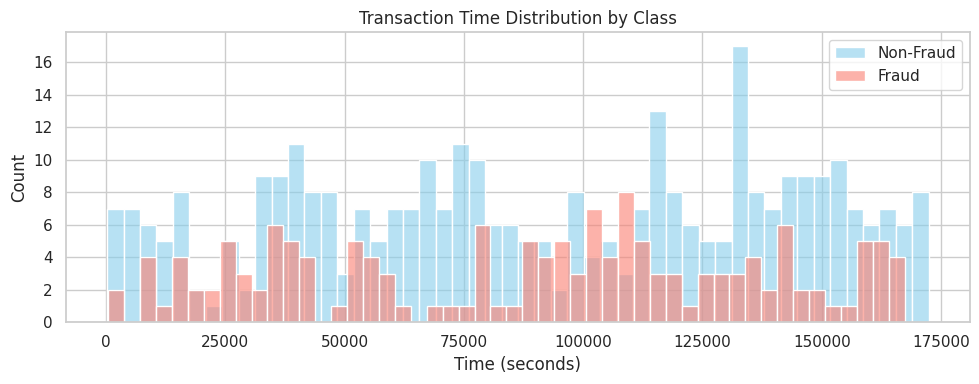

In [6]:
# Code Cell 8: Time vs Class (optional)
if 'Time' in df.columns:
    plt.figure(figsize=(10,4))
    sns.histplot(df[df['Class']==0]['Time'], bins=50, color='skyblue', label='Non-Fraud', alpha=0.6)
    sns.histplot(df[df['Class']==1]['Time'], bins=50, color='salmon', label='Fraud', alpha=0.6)
    plt.title('Transaction Time Distribution by Class')
    plt.xlabel('Time (seconds)')
    plt.legend()
    plt.tight_layout()
    plt.show()

"""
## Summary

- The dataset is highly imbalanced.
- Some features (e.g., V2, V4) show distinct distributions for fraud vs. non-fraud.
- No missing values.
- Time may or may not show trends depending on data.

This completes our EDA. We will now proceed to preprocessing and model training.
"""